In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

In [202]:
df = pd.read_excel("D:/Internship/flight_fare/flight-fare-prediction/data/Data_Train.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [203]:
df.isna().sum()/(len(df))*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [204]:
df = df.dropna()
df = df.reset_index(drop = True)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [205]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [206]:
df.drop(["Route","Additional_Info"], axis = 1, inplace = True)

In [207]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10678,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


In [208]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])
df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-05-21 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897
1,Air India,2019-01-05,Kolkata,Banglore,2022-05-21 05:50:00,2022-05-21 13:15:00,7h 25m,2 stops,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-05-21 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,2022-05-21 18:05:00,2022-05-21 23:30:00,5h 25m,1 stop,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-05-21 16:50:00,2022-05-21 21:35:00,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,2022-05-21 19:55:00,2022-05-21 22:25:00,2h 30m,non-stop,4107
10678,Air India,2019-04-27,Kolkata,Banglore,2022-05-21 20:45:00,2022-05-21 23:20:00,2h 35m,non-stop,4145
10679,Jet Airways,2019-04-27,Banglore,Delhi,2022-05-21 08:20:00,2022-05-21 11:20:00,3h,non-stop,7229
10680,Vistara,2019-01-03,Banglore,New Delhi,2022-05-21 11:30:00,2022-05-21 14:10:00,2h 40m,non-stop,12648


In [209]:
def year_month_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day

    return df

def duration_minutes(df): 
    df["Duration"] = df["Duration"].str.replace("h", "*60").str.replace(' ','+').str.replace("m","*1").apply(eval)

    return df 

def dep_arrival_extract(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return df

In [210]:
year_month_extract(df, "Date_of_Journey")

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-05-21 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,2022-05-21 05:50:00,2022-05-21 13:15:00,7h 25m,2 stops,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-05-21 09:25:00,2022-06-10 04:25:00,19h,2 stops,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,2022-05-21 18:05:00,2022-05-21 23:30:00,5h 25m,1 stop,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-05-21 16:50:00,2022-05-21 21:35:00,4h 45m,1 stop,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,2022-05-21 19:55:00,2022-05-21 22:25:00,2h 30m,non-stop,4107,2019,9,4
10678,Air India,2019-04-27,Kolkata,Banglore,2022-05-21 20:45:00,2022-05-21 23:20:00,2h 35m,non-stop,4145,2019,4,27
10679,Jet Airways,2019-04-27,Banglore,Delhi,2022-05-21 08:20:00,2022-05-21 11:20:00,3h,non-stop,7229,2019,4,27
10680,Vistara,2019-01-03,Banglore,New Delhi,2022-05-21 11:30:00,2022-05-21 14:10:00,2h 40m,non-stop,12648,2019,1,3


In [211]:
duration_minutes(df)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-05-21 22:20:00,2022-03-22 01:10:00,170,non-stop,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,2022-05-21 05:50:00,2022-05-21 13:15:00,445,2 stops,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-05-21 09:25:00,2022-06-10 04:25:00,1140,2 stops,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,2022-05-21 18:05:00,2022-05-21 23:30:00,325,1 stop,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-05-21 16:50:00,2022-05-21 21:35:00,285,1 stop,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,2022-05-21 19:55:00,2022-05-21 22:25:00,150,non-stop,4107,2019,9,4
10678,Air India,2019-04-27,Kolkata,Banglore,2022-05-21 20:45:00,2022-05-21 23:20:00,155,non-stop,4145,2019,4,27
10679,Jet Airways,2019-04-27,Banglore,Delhi,2022-05-21 08:20:00,2022-05-21 11:20:00,180,non-stop,7229,2019,4,27
10680,Vistara,2019-01-03,Banglore,New Delhi,2022-05-21 11:30:00,2022-05-21 14:10:00,160,non-stop,12648,2019,1,3


In [212]:
dep_arrival_extract(df, "Dep_Time")
dep_arrival_extract(df, "Arrival_Time")

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,2022-05-21 22:20:00,2022-03-22 01:10:00,170,non-stop,3897,2019,3,24,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,2022-05-21 05:50:00,2022-05-21 13:15:00,445,2 stops,7662,2019,1,5,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,2022-05-21 09:25:00,2022-06-10 04:25:00,1140,2 stops,13882,2019,9,6,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,2022-05-21 18:05:00,2022-05-21 23:30:00,325,1 stop,6218,2019,12,5,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,2022-05-21 16:50:00,2022-05-21 21:35:00,285,1 stop,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,2022-05-21 19:55:00,2022-05-21 22:25:00,150,non-stop,4107,2019,9,4,19,55,22,25
10678,Air India,2019-04-27,Kolkata,Banglore,2022-05-21 20:45:00,2022-05-21 23:20:00,155,non-stop,4145,2019,4,27,20,45,23,20
10679,Jet Airways,2019-04-27,Banglore,Delhi,2022-05-21 08:20:00,2022-05-21 11:20:00,180,non-stop,7229,2019,4,27,8,20,11,20
10680,Vistara,2019-01-03,Banglore,New Delhi,2022-05-21 11:30:00,2022-05-21 14:10:00,160,non-stop,12648,2019,1,3,11,30,14,10


In [213]:
df.drop(["Date_of_Journey", "Dep_Time", "Arrival_Time", "Date_of_Journey_year"], axis = 1, inplace=True)

In [214]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,150,non-stop,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,155,non-stop,4145,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,180,non-stop,7229,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,160,non-stop,12648,1,3,11,30,14,10


In [215]:
df.rename(columns = {'Date_of_Journey_month':'month', 'Date_of_Journey_day':'day', "Dep_Time_hour": "Dep_hour", 
"Dep_Time_minute":"Dep_minute", "Arrival_Time_hour":"Arrival_hour", "Arrival_Time_minute":"Arrival_minute"}, inplace = True)

In [216]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,150,non-stop,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,155,non-stop,4145,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,180,non-stop,7229,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,160,non-stop,12648,1,3,11,30,14,10


In [217]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [218]:
df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,150,0,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,155,0,4145,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,180,0,7229,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,160,0,12648,1,3,11,30,14,10


In [219]:
df["Total_Stops"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [220]:
print(df["Source"].unique())
print(df["Destination"].unique())

['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']


In [221]:
df = df.replace("Delhi", "New Delhi")
df = df.replace("Banglore", "Bengaluru")
df

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10


In [222]:
def geo_extraction(df, col1 = "Source", col2 = "Destination"):

    """"
    This function get the coordinates for the airports based on the city efficiently
    (using minimal calls from geopy API based only on unique cities instead of iterating 
    over all the cities ) 
    """

    src = list(df[col1].unique())
    des = list(df[col2].unique())

    cities = []

    for i in src, des:
      cities.append(i)
    cities = list(set(np.ravel(cities)))

    airport_name = []

    for city in cities:
        airport_name.append(city + " International Airport")

    airports_dict = dict(zip(cities, airport_name))

    airport_src = []
    airport_des = []

    for i, j in zip(df[col1], df[col2]):
        for k, v in airports_dict.items():
            if i == k:
                airport_src.append(v)
            if j == k:
                airport_des.append(v)

    df[col1 + "_Airport"] = airport_src
    df[col2 + "_Airport"] = airport_des

    geolocator = Nominatim(user_agent="my-flight-fare")
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

    lat = []
    lon = []

    for airport in airport_name:
        location = geolocator.geocode(airport)
        lat.append(location.latitude)
        lon.append(location.longitude)

    geo = tuple(zip(lat, lon))

    airport_geo = dict(zip(airport_name, geo))

    src_geo = []
    des_geo = []

    for src_airport, des_airport in zip(df[col1 + "_Airport"], df[col2 + "_Airport"]):
        for k, v in airport_geo.items():
            if src_airport == k:
                src_geo.append(v)
            if des_airport == k:
                des_geo.append(v)

    df[[col1 + '_Lat', col1 + '_Lon']] = pd.DataFrame(src_geo, index=df.index)
    df[[col2 + '_Lat', col2 + '_Lon']] = pd.DataFrame(des_geo, index=df.index)

    return df 

In [223]:
geo_extraction(df, "Source", "Destination")

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Source_Airport,Destination_Airport,Source_Lat,Source_Lon,Destination_Lat,Destination_Lon
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,New Delhi International Airport,Cochin International Airport,28.555168,77.084738,10.154486,76.392489
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738


In [142]:
print(df["Source"].unique())
print(df["Destination"].unique())

['Bengaluru' 'Kolkata' 'New Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Bengaluru' 'Cochin' 'Kolkata' 'Hyderabad']


In [143]:
src = list(df["Source"].unique())
des = list(df["Destination"].unique())
cities = []
for i in src:
    cities.append(i)

for j in des:
    cities.append(j)

cities = list(set(cities))

airport_name = []

for city in cities:
    airport_name.append(city + " International Airport")

airports_dict = dict(zip(cities, airport_name))
airports_dict

{'Hyderabad': 'Hyderabad International Airport',
 'Chennai': 'Chennai International Airport',
 'New Delhi': 'New Delhi International Airport',
 'Bengaluru': 'Bengaluru International Airport',
 'Cochin': 'Cochin International Airport',
 'Kolkata': 'Kolkata International Airport',
 'Mumbai': 'Mumbai International Airport'}

In [144]:
def airport_extract(df, col1, col2):

    airport_src = []
    airport_des = []

    for i in df[col1]:
        for k, v in airports_dict.items():
            if i == k:
                airport_src.append(v)

    for i in df[col2]:
        for k, v in airports_dict.items():
            if i == k:
                airport_des.append(v)

    df[col1 + "_Airport"] = airport_src
    df[col2 + "_Airport"] = airport_des

    return df 

In [145]:
airport_extract(df, "Source", "Destination")

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Source_Airport,Destination_Airport
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,Bengaluru International Airport,New Delhi International Airport
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,Kolkata International Airport,Bengaluru International Airport
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,New Delhi International Airport,Cochin International Airport
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,Kolkata International Airport,Bengaluru International Airport
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,Bengaluru International Airport,New Delhi International Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,Kolkata International Airport,Bengaluru International Airport
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,Kolkata International Airport,Bengaluru International Airport
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,Bengaluru International Airport,New Delhi International Airport
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,Bengaluru International Airport,New Delhi International Airport


In [146]:
airport_name

['Hyderabad International Airport',
 'Chennai International Airport',
 'New Delhi International Airport',
 'Bengaluru International Airport',
 'Cochin International Airport',
 'Kolkata International Airport',
 'Mumbai International Airport']

In [147]:
geolocator = Nominatim(user_agent="my-flight-fare")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

In [148]:
location = geolocator.geocode("Bengaluru International Airport")
print((location.latitude, location.longitude))

(13.196697, 77.70758655918868)


In [149]:
lat = []
lon = []

for i in airport_name:
  location = geolocator.geocode(i)
  lat.append(location.latitude)
  lon.append(location.longitude)

geo = tuple(zip(lat, lon))

In [150]:
airport_geo = dict(zip(airport_name, geo))
airport_geo

{'Hyderabad International Airport': (17.231163600000002, 78.43178336758146),
 'Chennai International Airport': (12.993374, 80.17258667392555),
 'New Delhi International Airport': (28.5551678, 77.08473847979485),
 'Bengaluru International Airport': (13.196697, 77.70758655918868),
 'Cochin International Airport': (10.15448595, 76.39248892735499),
 'Kolkata International Airport': (22.656376, 88.44671657668405),
 'Mumbai International Airport': (19.0901312, 72.86370318520977)}

In [151]:
src_geo = []
des_geo = []

for i in df["Source_Airport"]:
  for k, v in airport_geo.items():
    if i == k:
      src_geo.append(v)

for j in df["Destination_Airport"]:
  for k, v in airport_geo.items():
    if j == k:
      des_geo.append(v)

In [181]:
df["Source_Airport"]

0        Bengaluru International Airport
1          Kolkata International Airport
2        New Delhi International Airport
3          Kolkata International Airport
4        Bengaluru International Airport
                      ...               
10677      Kolkata International Airport
10678      Kolkata International Airport
10679    Bengaluru International Airport
10680    Bengaluru International Airport
10681    New Delhi International Airport
Name: Source_Airport, Length: 10682, dtype: object

In [187]:
src_geo = []
des_geo = []

for i, j in zip(df["Source_Airport"], df["Destination_Airport"]):
    for k, v in airport_geo.items():
        if i == k:
            src_geo.append(v)
        if j == k:
            des_geo.append(v)

In [152]:
df[['Source_Lat', 'Source_Lon']] = pd.DataFrame(src_geo, index=df.index) 
df[['Destination_Lat', 'Destination_Lon']] = pd.DataFrame(des_geo, index=df.index) 

In [153]:
df

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Source_Airport,Destination_Airport,Source_Lat,Source_Lon,Destination_Lat,Destination_Lon
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,New Delhi International Airport,Cochin International Airport,28.555168,77.084738,10.154486,76.392489
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,Kolkata International Airport,Bengaluru International Airport,22.656376,88.446717,13.196697,77.707587
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,Bengaluru International Airport,New Delhi International Airport,13.196697,77.707587,28.555168,77.084738


In [107]:
df.drop(["Source_Airport", "Destination_Airport"], axis = 1, inplace = True)
df

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Source_Lat,Source_Lon,Destination_Lat,Destination_Lon
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,13.196697,77.707587,28.555168,77.084738
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,22.656376,88.446717,13.196697,77.707587
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,28.555168,77.084738,10.154486,76.392489
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,22.656376,88.446717,13.196697,77.707587
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,13.196697,77.707587,28.555168,77.084738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,22.656376,88.446717,13.196697,77.707587
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,22.656376,88.446717,13.196697,77.707587
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,13.196697,77.707587,28.555168,77.084738
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,13.196697,77.707587,28.555168,77.084738


In [108]:
# Haversine Formula 
from math import radians, cos, sin, asin, sqrt

def haversine_dist(lon1, lat1, lon2, lat2):

    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)
    lon1 = np.radians(lon1)
    lon2 = np.radians(lon2)

    # Haversine formula 
    dlat = lat2 - lat1
    dlon = lon2 - lon1 
    a = np.sin(dlat / 2.0)** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2

    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371 # radius of earth in km

    distance = c * r

    return distance

In [112]:
def add_distance(df):
    df["flight_distance"] = haversine_dist(df["Source_Lon"], 
    df["Source_Lat"], 
    df["Destination_Lon"], df["Destination_Lat"])

    df.drop(["Source_Lat", "Source_Lon", "Destination_Lat", "Destination_Lon"], axis = 1, inplace=True)
    return df

In [113]:
add_distance(df)

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,flight_distance
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,1,10,1708.999039
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,13,15,1546.957213
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,2047.335727
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,23,30,1546.957213
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,21,35,1708.999039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Bengaluru,150,0,4107,9,4,19,55,22,25,1546.957213
10678,Air India,Kolkata,Bengaluru,155,0,4145,4,27,20,45,23,20,1546.957213
10679,Jet Airways,Bengaluru,New Delhi,180,0,7229,4,27,8,20,11,20,1708.999039
10680,Vistara,Bengaluru,New Delhi,160,0,12648,1,3,11,30,14,10,1708.999039


In [114]:
df.corr()

,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,flight_distance
Duration,1.000000,0.738071,0.506480,0.055136,-0.038360,0.002088,-0.019099,0.051531,-0.069663,0.311646
Total_Stops,0.738071,1.000000,0.603897,0.065495,-0.024136,-0.061476,-0.002618,0.038140,-0.106940,0.443709
Price,0.506480,0.603897,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.317873
month,0.055136,0.065495,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.005098
day,-0.038360,-0.024136,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,0.071908
Dep_hour,0.002088,-0.061476,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,-0.069170
Dep_minute,-0.019099,-0.002618,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597,-0.072407
Arrival_hour,0.051531,0.038140,0.024244,-0.004329,-0.002176,0.005180,0.043122,1.000000,-0.154363,0.013037
Arrival_minute,-0.069663,-0.106940,-0.086155,-0.025786,-0.021423,0.067911,-0.017597,-0.154363,1.000000,-0.172354
flight_distance,0.311646,0.443709,0.317873,0.005098,0.071908,-0.069170,-0.072407,0.013037,-0.172354,1.000000


### Encoding Categorical Variables

In [115]:
dummy_year = pd.get_dummies(df["Airline"], prefix="Airline", drop_first= True)
dummy_month = pd.get_dummies(df["Source"], prefix="Source", drop_first= True)
dummy_crime_type = pd.get_dummies(df["Destination"], prefix="Destination", drop_first= True)

In [116]:
df = pd.concat([df, dummy_year, dummy_month, dummy_crime_type], axis=1)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Bengaluru,New Delhi,170,0,3897,3,24,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Bengaluru,445,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,New Delhi,Cochin,1140,2,13882,9,6,9,25,...,0,0,0,0,0,1,1,0,0,0
3,IndiGo,Kolkata,Bengaluru,325,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Bengaluru,New Delhi,285,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [117]:
df.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
df

,Duration,Total_Stops,Price,month,day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,flight_distance,...,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Kolkata,Source_Mumbai,Source_New Delhi,Destination_Cochin,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,3,24,22,20,1,10,1708.999039,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,1546.957213,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,2047.335727,...,0,0,0,0,0,1,1,0,0,0
3,325,1,6218,12,5,18,5,23,30,1546.957213,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,1708.999039,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,150,0,4107,9,4,19,55,22,25,1546.957213,...,0,0,0,1,0,0,0,0,0,0
10678,155,0,4145,4,27,20,45,23,20,1546.957213,...,0,0,0,1,0,0,0,0,0,0
10679,180,0,7229,4,27,8,20,11,20,1708.999039,...,0,0,0,0,0,0,0,0,0,1
10680,160,0,12648,1,3,11,30,14,10,1708.999039,...,1,0,0,0,0,0,0,0,0,1


In [118]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'month', 'day', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'flight_distance',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Kolkata', 'Source_Mumbai', 'Source_New Delhi',
       'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

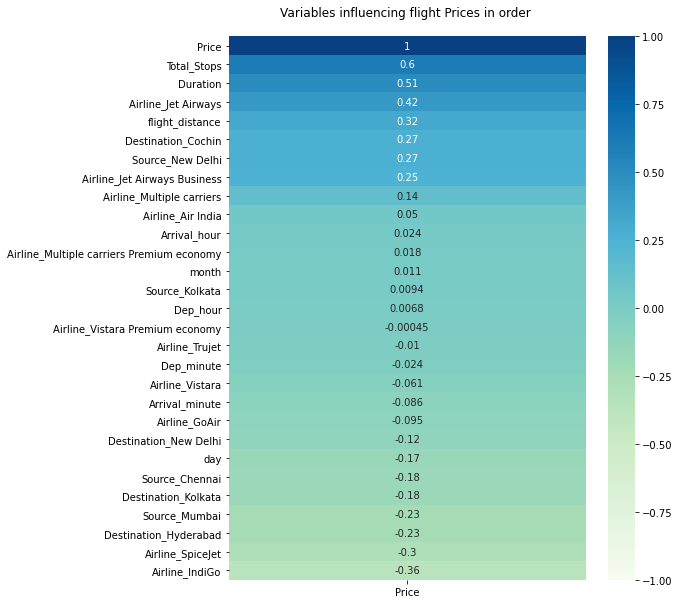

In [119]:
plt.rcParams['figure.figsize'] = [8, 10]

_ = sns.heatmap(df.corr()[['Price']]
                .sort_values(by='Price', ascending=False),
                vmin=-1,
                vmax=1,
                annot=True,
                cmap='GnBu');

_.set_title('Variables influencing flight Prices in order ',
            fontdict={'fontsize':12},
            pad=20);

plt.show()